In [1]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
pd.options.display.max_rows=1000
pd.options.display.max_columns=1000
import matplotlib.pyplot as plt
%matplotlib inline
## This code launched only once per adding new simulations
def SortData(df):
    envs = ['Env{}'.format(i) for i in np.sort(df.Env.unique())]
    col = ['model','Dominant_Moving','type']+envs
    accomplished=pd.DataFrame(columns=col)
    accsteps = pd.DataFrame(columns=col)
    models=['train']#,'target']
    counter =0
    for mod in df.model.unique():
        domagnt=[False]
        for dom in domagnt:
            for typ in models:
                print(mod,dom,typ)
                counter+=1
                curr= df[(df.model==mod)&(df.Dom_Moving==dom)&(df.type==typ)]
                row=[mod,dom,typ]
                accomplished = accomplished.append(
                    pd.Series(row+[curr[curr.Env==envv].Reward.as_matrix()[0]>0 for envv in np.sort(df.Env.unique())]
                              ,index=col),ignore_index=True)
                accsteps = accsteps.append(pd.Series(
                    row+[curr[curr.Env==envv].Steps.as_matrix()[0] for envv in np.sort(df.Env.unique())]
                              ,index=col),ignore_index=True)
    return accomplished,accsteps

def MAP_ALL(df):
    """df : data set
    type: train or target
    Model: 599,800 etc...
    """
    maps = {}
    for mod in df.model.unique():#[599,1500]:
        for typ in ['train']:
            maps[(mod,typ)] = np.zeros((10,5))
            for i in range(1,11):
                for j in [0,100,200,300,400]:
                    maps[(mod,typ)][i-1,j//100] =df[(df.model==mod)&(df.type==typ)&(df.Env==(j+i))]['Reward']
    return maps

def Final_Table(accomplished):
    col = ['Env','org','allshft','domshft','subshft','foodshft']
    final_df = pd.DataFrame(columns=col)
    for j in range(accomplished.shape[0]):
        tot = [np.sum(accomplished.iloc[j][['Env{}'.format(i),
                                           'Env{}'.format(i+100),
                                           'Env{}'.format(i+200),
                                           'Env{}'.format(i+300),
                                           'Env{}'.format(i+400)]]) for i in [x for x in range(1,17)]]
        row = [accomplished.iloc[j][i] for i in range(3)]
        row += tot
        final_df = final_df.append(pd.Series(row,index=col),ignore_index=True)
    return final_df

In [2]:
df = pd.read_csv('FinalResults.csv',header=None)
df.columns=['model','type','Env','steps','Reward','time','dom']
df.head()

,model,type,Env,steps,Reward,time,dom
0,595,train,1,999,-100.0,130.415042,False
1,595,train,2,999,-100.0,76.586785,False
2,595,train,3,999,-100.0,73.974728,False
3,595,train,4,999,-100.0,75.400271,False
4,595,train,5,999,-100.0,77.382311,False


In [3]:
df_map = MAP_ALL(df)

In [4]:
df_map.keys()

dict_keys([(1516, 'train'), (598, 'train'), (1517, 'train'), (1512, 'train'), (1513, 'train'), (596, 'train'), (1515, 'train'), (597, 'train'), (599, 'train'), (595, 'train'), (600, 'train'), (601, 'train'), (1511, 'train'), (1514, 'train')])

In [18]:
Seed=['Seed 1','Seed 2','Seed 3','Seed 4','Seed 5','Seed 6','Seed 7','Bugged']
Seed2=['595','596','597','598','599','600','601','Bugged']
NGAccuracy= [0.8,0.867,0.867,0.933,0.933,0.867,1,0.933]
GAccuracy = [0.629,0.6,0.714,0.6,0.943,0.914,0.914,0.971]
TAccuracy=[0.68,0.68,0.76,0.7,0.94,0.9,0.94,0.96]

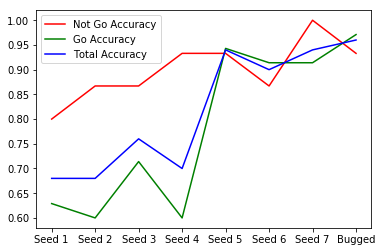

In [22]:
plt.plot(NGAccuracy,label='Not Go Accuracy',c='r')
plt.plot(GAccuracy,label='Go Accuracy',c='g')
plt.plot(TAccuracy,label='Total Accuracy',c='b')
plt.xticks(range(8),Seed)
plt.legend()

In [8]:
Perfect_Settings= np.array([[1,1,1,1,1],
                            [0,0,0,0,0],
                            [1,1,1,1,1],
                            [1,1,1,1,1],
                            [0,0,0,0,0],
                            [1,1,1,1,1],
                            [0,0,0,0,0],
                            [1,1,1,1,1],
                            [1,1,1,1,1],
                            [1,1,1,1,1]],dtype=np.bool)

In [9]:
import operator

In [10]:
df_map.keys()

dict_keys([(1516, 'train'), (598, 'train'), (1517, 'train'), (1512, 'train'), (1513, 'train'), (596, 'train'), (1515, 'train'), (597, 'train'), (599, 'train'), (595, 'train'), (600, 'train'), (601, 'train'), (1511, 'train'), (1514, 'train')])

In [21]:
T= PrettyTable(['Model','Total Steps','Not Go Accuracy','Go Accuracy','Total Accuracy'])
#for j in [(601,'train'),(1513,'train')]:
for j in df_map.keys():
    tmp = np.array(df_map[j]>0,dtype=np.int0)
    #print(j)
    #print(np.array(tmp==Perfect_Settings,dtype=np.int0))
    Total_mean = np.round(np.mean(Perfect_Settings==tmp),3)
    NotGo_mean = np.round(np.mean(np.array(Perfect_Settings==tmp)[[1,4,6]]),3)
    Go_mean = np.round(np.mean(np.array(Perfect_Settings==tmp)[[0,2,3,5,7,8,9]]),3)
    #print(tmp)
    T.add_row([j[0],'500K' if j[0]<800 else '2M',NotGo_mean,Go_mean,Total_mean])
#print(T)
print(T.get_string(sort_key=operator.itemgetter(0, 4), sortby="Model"))
    #print('Model:{}NotGo:{},Go:{},Total:{}'.format(j[0],NotGo_mean,Go_mean,Total_mean))

+-------+-------------+-----------------+-------------+----------------+
| Model | Total Steps | Not Go Accuracy | Go Accuracy | Total Accuracy |
+-------+-------------+-----------------+-------------+----------------+
|  595  |     500K    |       0.8       |    0.686    |      0.72      |
|  596  |     500K    |      0.867      |    0.629    |      0.7       |
|  597  |     500K    |      0.867      |    0.743    |      0.78      |
|  598  |     500K    |      0.933      |    0.686    |      0.76      |
|  599  |     500K    |       0.8       |    0.514    |      0.6       |
|  600  |     500K    |      0.867      |    0.943    |      0.92      |
|  601  |     500K    |       1.0       |    0.943    |      0.96      |
|  1511 |      2M     |       0.8       |    0.943    |      0.9       |
|  1512 |      2M     |       1.0       |    0.486    |      0.64      |
|  1513 |      2M     |       0.8       |    0.943    |      0.9       |
|  1514 |      2M     |      0.933      |    0.514 

In [8]:
T= PrettyTable(['Model','Total Steps','Not Go Accuracy','Go Accuracy','Total Accuracy'])
for j in df_map.keys():
    tmp = np.array(df_map[j]>0,dtype=np.int0)
    Total_mean = np.round(np.mean(Perfect_Settings==tmp),3)
    NotGo_mean = np.round(np.mean(np.array(Perfect_Settings==tmp)[[1,4,6]]),3)
    Go_mean = np.round(np.mean(np.array(Perfect_Settings==tmp)[[0,2,3,5,7,8,9]]),3)
    #print(tmp)
    T.add_row([j[0],'500K' if j[0]<800 else '2M',NotGo_mean,Go_mean,Total_mean])
#print(T)
print(T.get_string(sort_key=operator.itemgetter(0, 4), sortby="Total Accuracy"))
    #print('Model:{}NotGo:{},Go:{},Total:{}'.format(j[0],NotGo_mean,Go_mean,Total_mean))

+-------+-------------+-----------------+-------------+----------------+
| Model | Total Steps | Not Go Accuracy | Go Accuracy | Total Accuracy |
+-------+-------------+-----------------+-------------+----------------+
|  1516 |      2M     |      0.733      |    0.514    |      0.58      |
|  599  |     500K    |       0.8       |    0.514    |      0.6       |
|  1517 |      2M     |      0.733      |    0.543    |      0.6       |
|  1512 |      2M     |       1.0       |    0.486    |      0.64      |
|  1514 |      2M     |      0.933      |    0.514    |      0.64      |
|  596  |     500K    |      0.867      |    0.629    |      0.7       |
|  595  |     500K    |       0.8       |    0.686    |      0.72      |
|  598  |     500K    |      0.933      |    0.686    |      0.76      |
|  597  |     500K    |      0.867      |    0.743    |      0.78      |
|  1515 |      2M     |       0.8       |    0.771    |      0.78      |
|  1511 |      2M     |       0.8       |    0.943 

In [39]:
df = pd.read_csv('FinalResults.csv',header=None)
df.columns = ['model','type','Env','Steps','Reward','Time','Dom_Moving']

In [7]:
best = pd.read_csv('Summary_Reward.csv')
accsteps=pd.read_csv('Summary_Steps.csv')
best[best.columns[3:]] = best[best.columns[3:]]>0
best['Total']=np.sum(best[best.columns[3:]].as_matrix(),axis=1)

In [3]:
conditions= (best.Env1==True)&(best.Env2==False)&(best.Env4==True)&(best.Env5==False)&\
            (best.Env8==True)&(best.Env9==True)&(best.Env10==True)&(best.Env12==True)&\
            (best.Env14==True)&(best.Env15==True)
best[(conditions)]

,model,type,Dominant_Moving,Env1,Env2,Env3,Env4,Env5,Env6,Env7,Env8,Env9,Env10,Env11,Env12,Env13,Env14,Env15,Env16,Total
124,867,train,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
125,867,target,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
126,868,train,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
164,887,train,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
165,887,target,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
186,898,train,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
187,898,target,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
188,899,train,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11
195,902,target,False,True,False,True,True,False,False,False,True,True,True,False,True,True,True,True,True,11


In [9]:
best2 = pd.read_csv('Summary_Rewardd.csv')
accsteps2=pd.read_csv('Summary_Stepss.csv')
best2[best2.columns[3:]] = best2[best2.columns[3:]]>0
best2['Total']=np.sum(best2[best2.columns[3:]].as_matrix(),axis=1)

In [13]:
best2[(best2.model.isin([599]))&(best2.Dominant_Moving==False)]

,model,type,Dominant_Moving,Env1,Env2,Env3,Env4,Env5,Env6,Env7,Env8,Env9,Env10,Env11,Env12,Total
1049,599.0,train,False,True,False,True,True,True,True,False,True,True,True,False,True,9
1051,599.0,target,False,True,False,True,True,False,False,False,True,True,True,False,False,6


In [16]:
accsteps[(conditions)]

,model,type,Dominant_Moving,Env1,Env2,Env3,Env4,Env5,Env6,Env7,Env8,Env9,Env10,Env11,Env12,Env13,Env14,Env15,Env16
124,867,train,False,3,999,3,3,999,999,999,3,3,7,999,4,999.5,999.5,999.5,999.6
125,867,target,False,3,999,3,3,999,999,999,3,3,7,999,4,999.5,999.5,999.5,999.6
126,868,train,False,3,999,3,3,999,999,999,3,3,8,999,4,999.5,999.5,999.5,999.6
164,887,train,False,3,999,3,3,999,999,999,3,3,9,999,4,999.5,999.5,999.5,999.6
165,887,target,False,3,999,3,3,999,999,999,3,3,9,999,4,999.5,999.5,999.5,999.6
186,898,train,False,3,999,3,3,999,999,999,3,3,8,999,4,999.5,999.1,999.1,999.6
187,898,target,False,3,999,3,3,999,999,999,3,3,8,999,4,999.5,999.3,999.1,999.6
188,899,train,False,3,999,3,3,999,999,999,3,3,8,999,4,999.3,999.5,999.3,999.6
195,902,target,False,3,999,3,3,999,999,999,5,3,8,999,4,999.5,999.3,999.3,999.6


<img src="./../pt_envs.png"></img>

<img src="./../envs.png"></img>

# Backup code

In [4]:

#accomplished.to_csv('Summary_Reward.csv',index=False)
#accsteps.to_csv('Summary_Steps.csv',index=False)

In [4]:
accomplished[(accomplished.model==599)&(accomplished.type=='train')]

,model,Dominant_Moving,type,Env1,Env2,Env3,Env4,Env5,Env6,Env7,Env8,Env9,Env10,Env11,Env12,Env13,Env14,Env15,Env16,Env101,Env102,Env103,Env104,Env105,Env106,Env107,Env108,Env109,Env110,Env111,Env112,Env113,Env114,Env115,Env116,Env201,Env202,Env203,Env204,Env205,Env206,Env207,Env208,Env209,Env210,Env211,Env212,Env213,Env214,Env215,Env216,Env301,Env302,Env303,Env304,Env305,Env306,Env307,Env308,Env309,Env310,Env311,Env312,Env313,Env314,Env315,Env316,Env401,Env402,Env403,Env404,Env405,Env406,Env407,Env408,Env409,Env410,Env411,Env412,Env413,Env414,Env415,Env416
0,599,False,train,True,False,True,True,False,False,False,True,True,True,False,True,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,True,True,False,True,True,False,False,False,True,True,True,False,True,False,False,False,True,True,False,True,True,False,False,False,True,True,True,False,False,False,False,False,True,True,False,True,True,False,False,False,True,True,True,False,True,True,False,False,True


In [7]:
accsteps[accsteps.model==599]

,model,type,Dominant_Moving,Env1,Env2,Env3,Env4,Env5,Env6,Env7,...,Env407,Env408,Env409,Env410,Env411,Env412,Env413,Env414,Env415,Env416
0,599,False,train,3,999,3,3,999,999,999,...,999,4,6,8,999,3,3,999,999,2
1,599,False,target,3,999,3,3,999,999,999,...,999,4,999,8,999,3,3,999,999,2


In [25]:
df = pd.read_csv('FinalResults.csv',header=None)
df.columns = ['model','type','Env','Steps','Reward','Time','Dom_Moving']

In [33]:
for i in [0,100,200,300,400]:
    for j in [7,11,12,13,14,15]:
        print(i+j,df[(df.model==599)&(df.type=='train')&(df.Env==i+j)]['Reward'].as_matrix())

7 [-100.]
11 [-100. -100.]
12 [ 999.1  999.1]
13 [-100.   999.1]
14 [-100. -100.]
15 [-100. -100.]
107 [ 898.8]
111 [-100. -100.]
112 [-100. -100.]
113 [-100. -100.]
114 [-100. -100.]
115 [-100. -100.]
207 [-100.]
211 [-50100. -50100.]
212 [ 999.1  999.1]
213 [-100.   999.1]
214 [-100. -100.]
215 [-100. -200.]
307 [-100100.]
311 [-100. -100.]
312 [-100. -100.]
313 [-100. -100.]
314 [-100. -100.]
315 [-100. -100.]
407 [-100.]
411 [-100. -100.]
412 [ 999.6  999.6]
413 [ 999.6  999.6]
414 [-100. -100.]
415 [-100. -100.]


In [55]:
for i in [0,100,200,300,400]:
    print(df[(df.model==599)&(df.type=='train')&(df.Env==1+i)])

    model   type  Env  Steps  Reward      Time  Dom_Moving
80    599  train    1      3   999.6  0.178251       False
     model   type  Env  Steps  Reward      Time  Dom_Moving
144    599  train  101      3   999.6  0.161203       False
     model   type  Env  Steps  Reward      Time  Dom_Moving
127    599  train  201      3   999.6  0.131085       False
     model   type  Env  Steps  Reward     Time  Dom_Moving
111    599  train  301      2   999.7  0.11816       False
    model   type  Env  Steps  Reward      Time  Dom_Moving
95    599  train  401      4   999.5  0.137334       False


In [29]:
df.head()

,model,type,Env,Steps,Reward,Time,Dom_Moving
0,599,target,1,3,999.6,1.465233,False
1,599,target,2,999,-100.0,9.358220,False
2,599,target,3,3,999.6,0.128205,False
3,599,target,4,3,999.6,0.119511,False
4,599,target,5,999,-100.0,10.133590,False


In [51]:
df[(df.Env==i)&(df.model==mod)&(df.type==typ)]

,model,type,Env,Steps,Reward,Time,Dom_Moving
80,599,train,1,3,999.6,0.178251,False
484,599,train,1,3,999.6,0.171637,False
569,599,train,1,3,999.6,0.174900,False


In [50]:
maps = {}
for mod in [599]:
    for typ in ['train']:
        maps[(mod,typ)] = np.zeros((17,5))
        for i in [x for x in range(1,17)]:
            for j in [0,100,200,300,400]:
                maps[(mod,typ)][i-1,j//100] =df[(df.Env==i)&(df.model==mod)&(df.type==typ)]['Reward']
        maps[(mod,typ)][6]=maps[(mod,typ)][16]
        maps[(mod,typ)] = maps[(mod,typ)][:-1]

ValueError: setting an array element with a sequence.

In [49]:
dt = pd.DataFrame(maps[(599,'train')],columns=['Original','All_Shifted','Dom_Shifted','sub_shifted','food_shifted'])
dt.index+=1
#dt[dt>0]=1
#dt[dt<=0]=0
#dt['sum']= dt.sum(axis=1)
dt

,Original,All_Shifted,Dom_Shifted,sub_shifted,food_shifted
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0


In [48]:
col = ['Env','org','allshft','domshft','subshft','foodshft']
final_df = pd.DataFrame(columns=col)
for j in range(accomplished.shape[0]):
    tot = [np.sum(accomplished.iloc[j][['Env{}'.format(i),
                                       'Env{}'.format(i+100),
                                       'Env{}'.format(i+200),
                                       'Env{}'.format(i+300),
                                       'Env{}'.format(i+400)]]) for i in [x for x in range(1,17)]]
    row = [accomplished.iloc[j][i] for i in range(3)]
    row += tot
    
    final_df = final_df.append(pd.Series(row,index=col),ignore_index=True)
#accomplished=pd.DataFrame(columns=col)

ValueError: Wrong number of items passed 19, placement implies 6

In [40]:
accomplished = pd.read_csv('Summary_Reward.csv')

In [46]:
envs = ['Env{}'.format(i) for i in range(1,17)]
col = ['model','Dominant_Moving','type']+envs
final_df = pd.DataFrame(columns=col)
for j in range(accomplished.shape[0]):
    tot = [np.sum(accomplished.iloc[j][['Env{}'.format(i),
                                       'Env{}'.format(i+100),
                                       'Env{}'.format(i+200),
                                       'Env{}'.format(i+300),
                                       'Env{}'.format(i+400)]]) for i in [x for x in range(1,17)]]
    row = [accomplished.iloc[j][i] for i in range(3)]
    row += tot
    
    final_df = final_df.append(pd.Series(row,index=col),ignore_index=True)
#accomplished=pd.DataFrame(columns=col)

In [47]:
final_df

,model,Dominant_Moving,type,Env1,Env2,Env3,Env4,Env5,Env6,Env7,Env8,Env9,Env10,Env11,Env12,Env13,Env14,Env15,Env16
0,799,train,False,-100.0,-100.0,-100.0,-100.0,-300.0,-300.0,-100.0,-100.0,-100.0,-100.0,-100.0,999.5,999.5,-100.0,-100.0,-100.0
1,799,target,False,-300.0,-100.0,-100.0,-100.0,-300.0,-100.0,-100.0,-100.0,-99100.0,-100.0,-100.0,999.5,999.5,-100.0,-100.0,999.6
2,806,train,False,999.6,999.6,999.6,999.6,-100.0,-100.0,-100.0,999.6,999.6,999.2,-100.0,999.5,999.5,999.5,999.5,999.6
3,806,target,False,999.6,999.6,999.6,999.6,-100.0,-100.0,-100.0,999.6,999.6,999.2,-100.0,999.5,999.5,999.5,999.5,999.6
4,807,train,False,999.6,999.6,999.6,999.6,-100.0,999.2,899.2,999.6,999.6,999.2,-100.0,999.5,999.5,999.5,999.5,999.6
5,807,target,False,999.6,999.6,999.6,999.6,998.6,999.2,899.2,999.6,999.6,999.2,-200.0,999.5,999.5,999.5,999.5,999.6
6,808,train,False,999.6,999.6,999.6,999.6,-100.0,-100.0,-100.0,999.6,999.6,999.2,-400.0,999.5,999.5,999.5,999.5,999.6
7,808,target,False,999.6,999.6,999.6,999.6,998.5,-100.0,-100.0,999.6,999.6,999.2,-400.0,999.5,999.5,999.5,999.5,999.6
8,809,train,False,999.6,999.6,999.6,999.6,998.9,-100.0,-100.0,999.6,999.6,999.2,-100.0,999.5,999.5,999.5,999.5,999.6
9,809,target,False,999.6,999.6,999.6,999.6,998.9,-100.0,-100.0,999.6,999.6,999.2,-100.0,999.5,999.5,999.5,999.5,999.6


In [ ]:
## This code launched only once per adding new simulations


accomplished.to_csv('Summary_Reward.csv',index=False)
accsteps.to_csv('Summary_Steps.csv',index=False)